# Проектная работа 3 Курс 2021/2022
# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Правка багов и аномалий (тестирование и исправление ошибок)
   4. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)
- *Бонусом можно обучить нейронную сеть, но это если будет желание)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

        Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
        Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r_i = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $


$ s_i = \gamma_{A}M_6 $


$ p_i = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $


$ q_i = \gamma_{J}M_2 $

## 2. План действий

### 2.1 Прямой ход работы
Мы генериеруем ключевые параметры А и В стратегий $v_i$ для двух стадий зоопланктона: молодых и взрослых особей. 

Далее мы с помощью А и В уже находим макропараметры $M_1,...,M_8$ и уже зная их мы можем с помощью имеющихся эмпирических данных посчитать значения функции фитнеса для всех стратегий. 

Следующим шагом нам предстоит воспользоваться сравнением пар получившихся значений фитнеса, чтобы разбить их на два базовых класс и уже эти классы мы предъявим нашему классификатору для непосредственного ранжирования с помощью метода опорных векторов или линейного дискриминанта Фишера 

### 2.2 Программный ход работы

Производим генерацию параметров стратегий, далее просчитываем макропараметры для каждой стратегии. Имея это можем найти значения известной функции фитнеса, а следовательно можем разделить на классы и уже непосредственно сформировать обучающую выборку, после ее формирования производим обучение моделей и получаем из этих моделей коэффициенты гиперплоскости, те в свою очередь являются коэффициентами функции фитнеса. На этом пока все, далее будет 2 Этап.

## 3. Реализация

### 3.1 Подготовка всех исходных данных

In [13]:
# Эмпирические данные 
alpha_j = 0.0016
alpha_a = 0.006
betta_j = 0.0000007
betta_a = 0.000000075
gamma_j = 0.00008
gamma_a = 0.004
delta_j = 0.000016
delta_a = 0.00006
sigma1 = 1
sigma2 = 1

D = 120
D0 = 70  

Nmax = 50

In [14]:
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров  
def rand_AB(Nmax):
   A_j, B_j, A_a, B_a = [], [], [], []
   for i in range(0, Nmax):
      Aj = round(rn.uniform(-D, 0), 4)
      Bj = round(rn.uniform(-min(Aj + D, -Aj), min(Aj + D, -Aj)), 4)
      A_j.append(Aj)
      B_j.append(Bj)

      Aa = round(rn.uniform(-D, 0), 4)
      Ba = round(rn.uniform(-min(Aa + D, -Aa), min(Aa + D, -Aa)), 4)
      A_a.append(Aa)
      B_a.append(Ba)
   data_strat = {'A_J': A_j, 'B_J': B_j, 'A_A': A_a, 'B_A': B_a}
   data = pd.DataFrame(data = data_strat)
   data.to_csv("data_strat.csv", index=False)
   return data
data_strat = rand_AB(Nmax)
data_strat

,A_J,B_J,A_A,B_A
0,-16.3475,-0.0515,-14.5195,-7.4397
1,-17.9482,-7.5911,-64.5456,-53.2479
2,-32.3658,-20.7322,-81.9987,8.3139
3,-91.0675,-13.7432,-57.5358,-28.2494
4,-3.1029,1.1045,-38.0835,1.6430
5,-74.4680,43.8302,-90.1164,-17.7843
6,-49.7019,14.0355,-97.8864,-7.4990
7,-80.8145,8.7561,-85.4780,-3.0050
8,-40.2965,-19.9223,-12.6477,7.0225
9,-108.8573,-3.8000,-4.9596,-2.5673


In [15]:
import pandas as pd
import numpy as np
# Подсчет макропараметров
def macroparams(data_strat):
   Aj = data_strat['A_J'].tolist()
   Bj = data_strat['B_J'].tolist()
   Aa = data_strat['A_A'].tolist()
   Ba = data_strat['B_A'].tolist()
   M1, M2, M3, M4, M5, M6, M7, M8 = [], [], [], [], [], [], [], []
   for i in range(0, Nmax):
      M1.append(sigma1*(Aj[i] + D))
      M2.append(-sigma2*(Aj[i] + D + Bj[i]/2))
      M3.append(-2*(np.pi*Bj[i])**2)
      M4.append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      M5.append(sigma1*(Aa[i] + D))
      M6.append(-sigma2*(Aa[i] + D + Ba[i]/2))
      M7.append(-2*(np.pi*Ba[i])**2)
      M8.append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2))
   M1, M2, M3, M4, M5, M6, M7, M8 = macro_norm(M1, M2, M3, M4, M5, M6, M7, M8)
   data_macro = {'M1': M1, 'M2': M2, 'M3': M3, 'M4': M4, 'M5': M5, 'M6': M6, 'M7': M7, 'M8': M8}
   data = pd.DataFrame(data = data_macro)
   data.to_csv("data_macro.csv", index=False)
   return M1, M2, M3, M4, M5, M6, M7, M8

# Нормализуем макропараметры для увеличения скорости классификатора
def macro_norm(M1, M2, M3, M4, M5, M6, M7, M8):
   M1_n, M2_n, M3_n, M4_n, M5_n, M6_n, M7_n, M8_n = [], [], [], [], [], [], [], []
   for i in range(0, Nmax):
      M1_n.append(M1[i]/max(np.abs(M1)))
      M2_n.append(M2[i]/max(np.abs(M2)))
      M3_n.append(M3[i]/max(np.abs(M3)))
      M4_n.append(M4[i]/max(np.abs(M4)))
      M5_n.append(M5[i]/max(np.abs(M5)))
      M6_n.append(M6[i]/max(np.abs(M6)))
      M7_n.append(M7[i]/max(np.abs(M7)))
      M8_n.append(M8[i]/max(np.abs(M8)))
   return M1_n, M2_n, M3_n, M4_n, M5_n, M6_n, M7_n, M8_n

In [16]:
import pandas as pd
# Считаем фитнесс
def fitness(Nmax):
   M1, M2, M3, M4, M5, M6, M7, M8 = macroparams(data_strat)
   J = []
   r, s, p, q = 0, 0, 0, 0
   for i in range(0, Nmax):
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   return data

data_fit_macro = fitness(Nmax)
data_fit_macro

,J,M1,M2,M3,M4,M5,M6,M7,M8
0,0.009481,0.865255,-0.865661,-0.000001,-0.590936,0.916900,-0.874935,-0.019284,-0.733607
1,0.004259,0.851893,-0.820797,-0.029996,-0.562115,0.482043,-0.247883,-0.987826,-0.341893
2,0.004311,0.731540,-0.645470,-0.223740,-0.334872,0.330330,-0.362475,-0.024082,-0.042170
3,0.004314,0.241518,-0.184289,-0.098317,-0.110501,0.542976,-0.415622,-0.278032,-0.130947
4,0.008082,0.975816,-0.981130,-0.000635,-0.918827,0.712067,-0.711379,-0.000940,-0.240936
5,0.002484,0.380085,-0.563429,-1.000000,-0.201285,0.259766,-0.180484,-0.110192,-0.132941
6,0.002312,0.586824,-0.645869,-0.102544,-0.104801,0.192225,-0.157894,-0.019592,-0.190329
7,0.003174,0.327107,-0.363914,-0.039909,-0.031879,0.300086,-0.283901,-0.003146,-0.057655
8,0.009644,0.665337,-0.582602,-0.206601,-0.221863,0.933170,-0.953202,-0.017181,-0.782782
9,0.008227,0.093015,-0.077210,-0.007517,-0.311442,1.000000,-0.978077,-0.002296,-1.000000


In [17]:
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
      
def data_class():
   data_fit_macro = fitness(Nmax)
   target = []
   for i in range(0, Nmax):
      for j in range(i + 1, Nmax):
         differ_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         target_ = classificator(differ_)
         target.append(differ_.append(pd.Series(target_, index =['target'])))
   data = pd.DataFrame(columns=['J', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'target'], data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data = data_class()
data


,J,M1,M2,M3,M4,M5,M6,M7,M8,target
0,0.005223,0.013362,-0.044863,0.029995,-0.028820,0.434857,-0.627052,0.968543,-0.391714,1.0
1,0.005171,0.133715,-0.220191,0.223739,-0.256063,0.586570,-0.512460,0.004798,-0.691437,1.0
2,0.005167,0.623736,-0.681372,0.098316,-0.480435,0.373923,-0.459314,0.258748,-0.602660,1.0
3,0.001400,-0.110561,0.115469,0.000634,0.327891,0.204832,-0.163556,-0.018343,-0.492671,1.0
4,0.006997,0.485170,-0.302232,0.999999,-0.389651,0.657133,-0.694451,0.090908,-0.600666,1.0
...,...,...,...,...,...,...,...,...,...,...
430,0.003409,-0.083482,0.081741,0.002166,0.245873,0.404381,-0.301724,-0.361437,-0.049135,1.0
431,0.001789,0.120422,-0.001899,0.283540,-0.225805,0.122499,-0.199840,0.551817,0.101350,1.0
432,0.004716,-0.518296,0.583425,-0.206456,0.819215,0.348907,-0.623867,-0.955767,-0.200170,1.0
433,0.003096,-0.314392,0.499785,0.074918,0.347537,0.067024,-0.521982,-0.042514,-0.049685,1.0


### 3.2 Реализация машинного обучения для SVM, LDA

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data.iloc[:, 1:-1].values 
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [34]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получим коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [35]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получим коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KNC_model = KNeighborsClassifier(n_neighbors=4)
KNC_model.fit(X_train, y_train)
KNC_prediction = KNC_model.predict(X_test)

In [76]:
# Считаем разницу SVM и LDA
from sklearn.metrics import accuracy_score
print('Точность метода опорных векторов: ', accuracy_score(SVC_prediction, y_test))
print('Точность Фишеровского дискриминанта: ', accuracy_score(LDA_prediction, y_test))
print('Точность К ближайшего соседа: ', accuracy_score(KNC_prediction, y_test))

Точность метода опорных векторов:  0.9655172413793104
Точность Фишеровского дискриминанта:  0.9885057471264368
Точность К ближайшего соседа:  0.9540229885057471


### 3.3 Графики 

#### 3.3.1 Двумерные

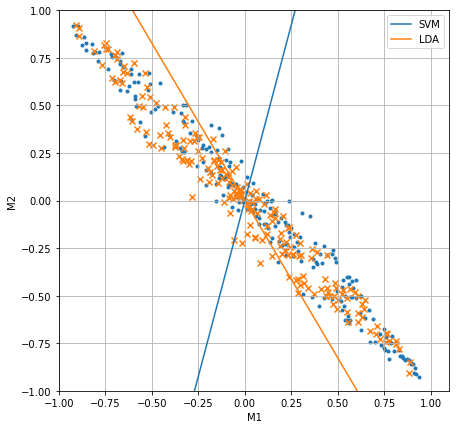

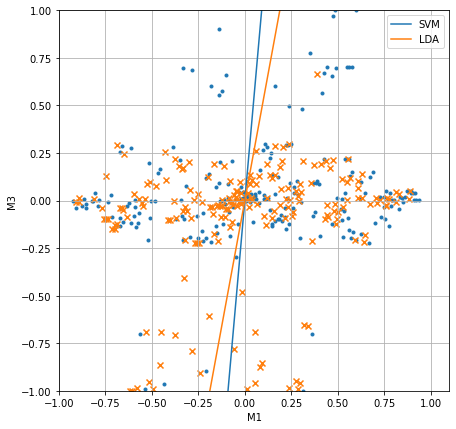

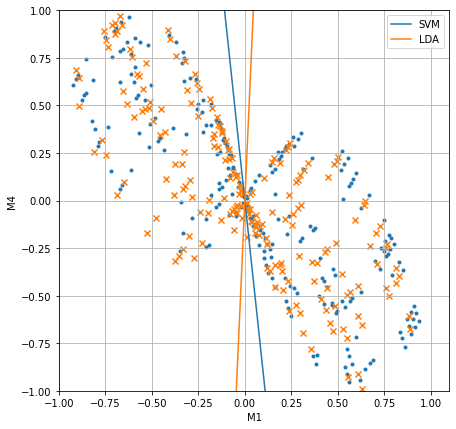

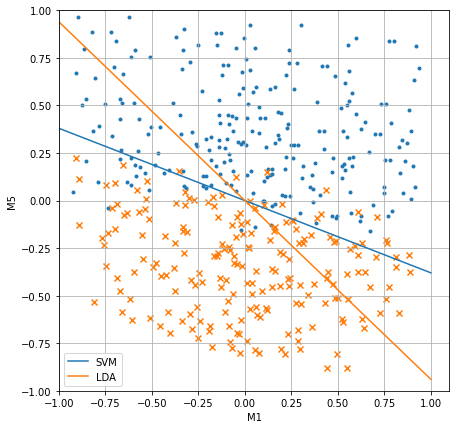

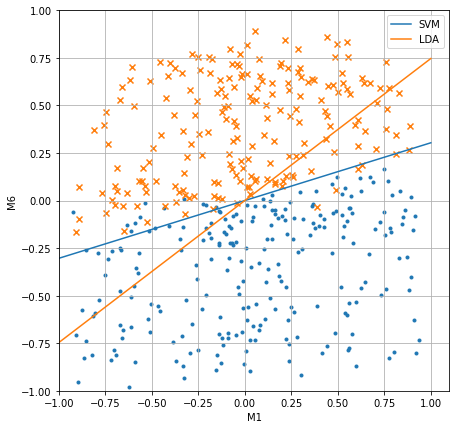

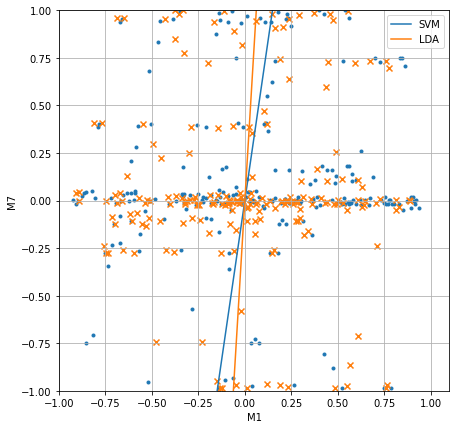

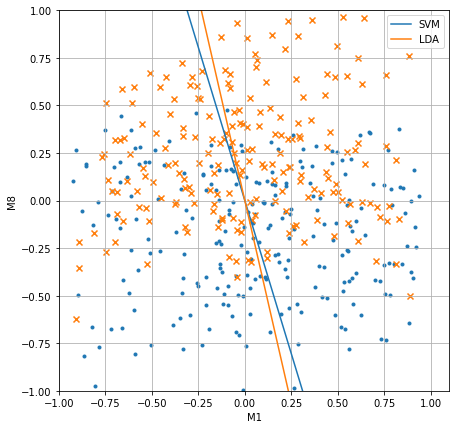

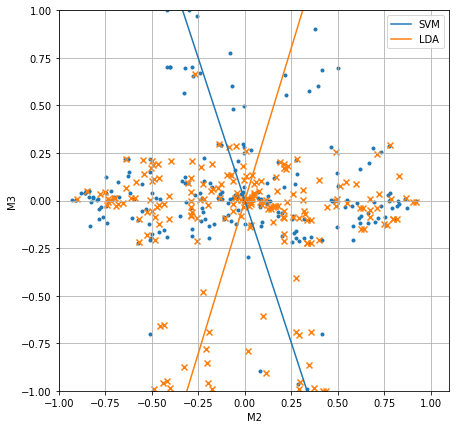

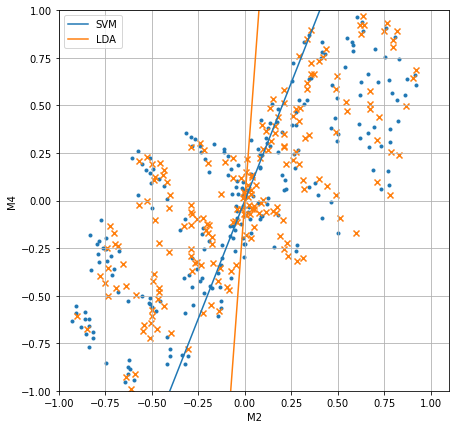

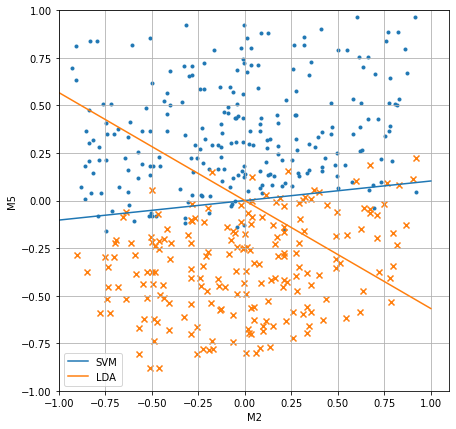

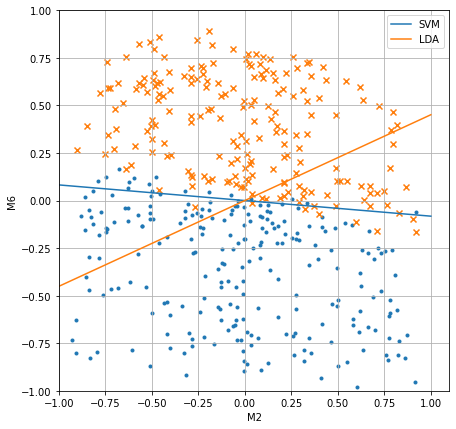

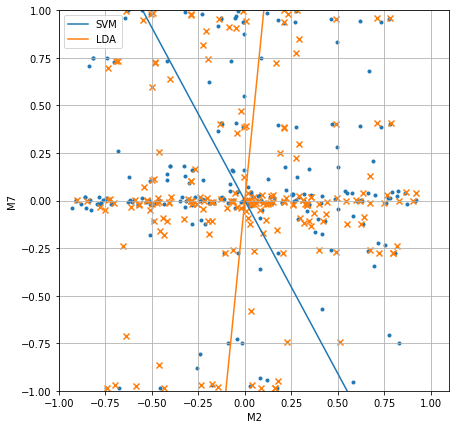

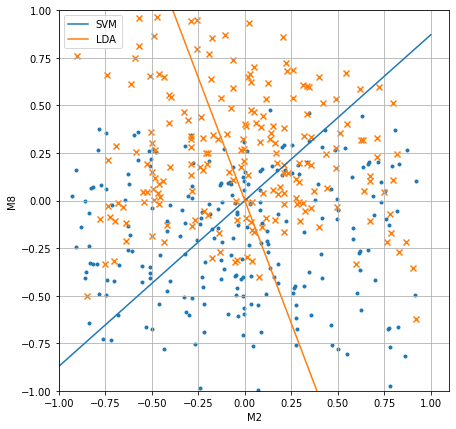

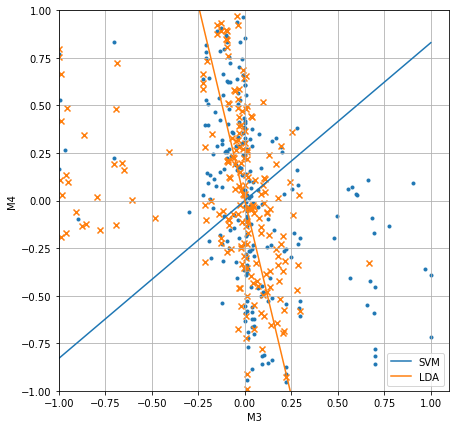

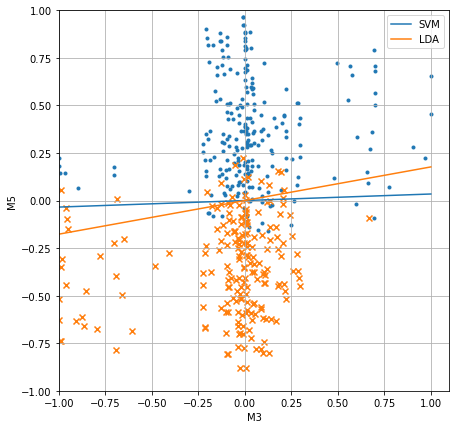

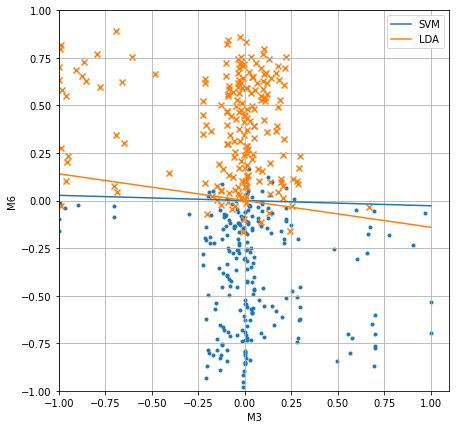

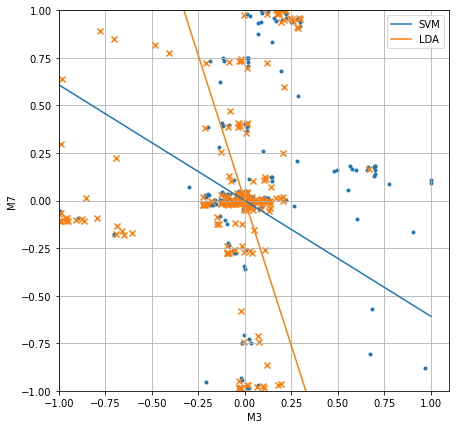

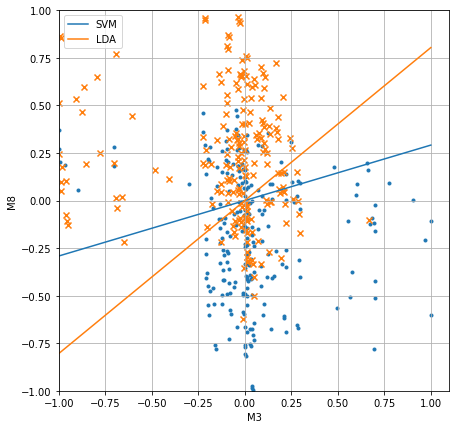

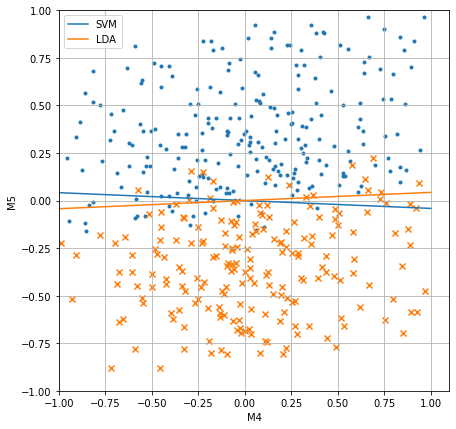

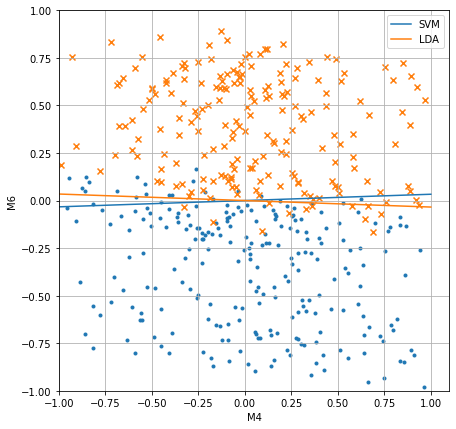

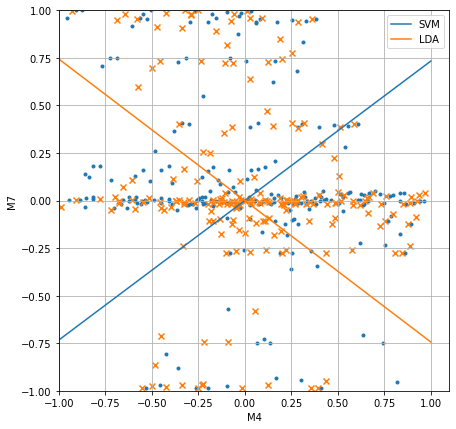

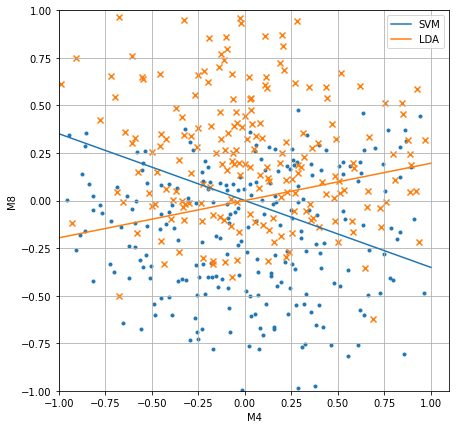

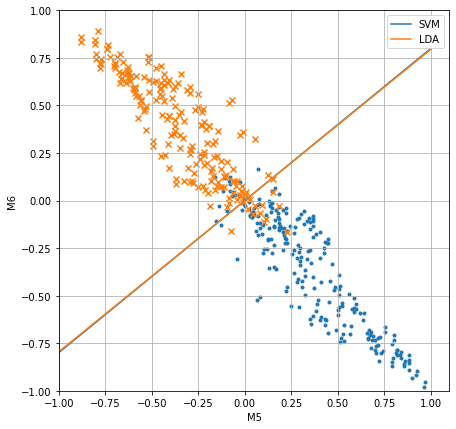

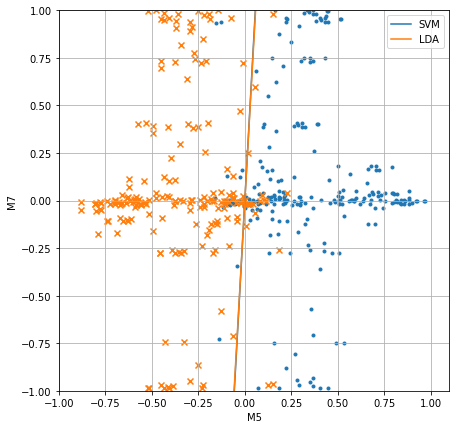

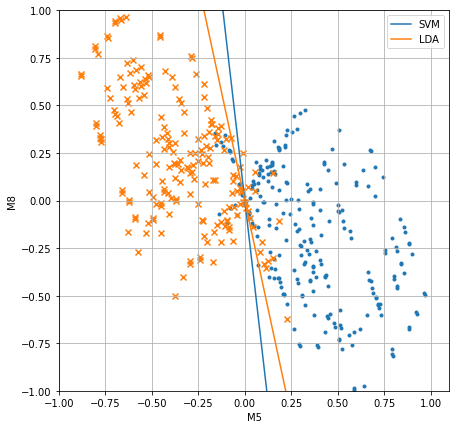

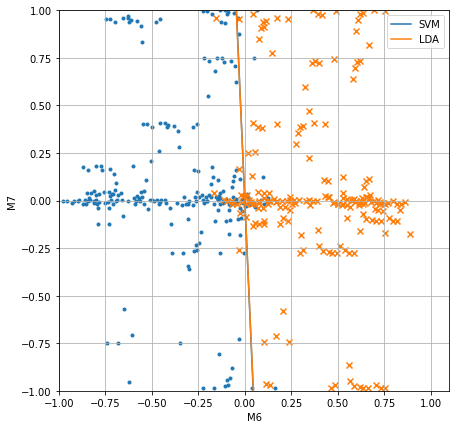

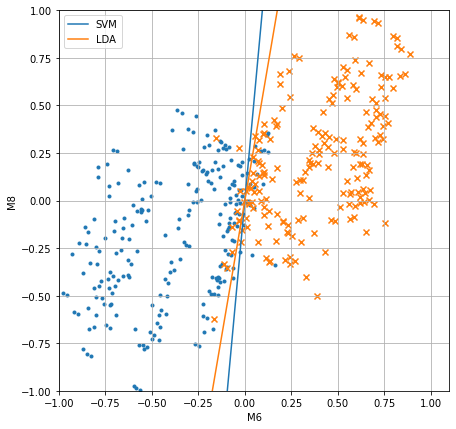

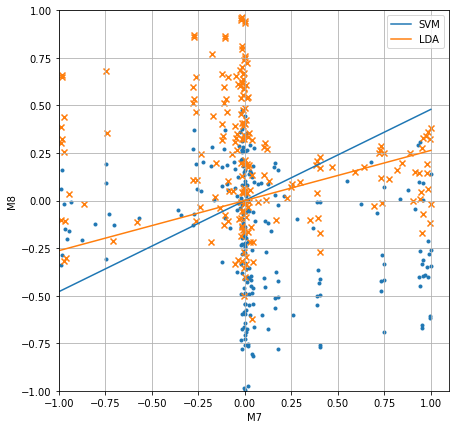

In [53]:
import matplotlib.pyplot as plt
X=data_class().loc[:,'M1':'M8']
y=data_class().loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
        plt.xlim(-1,)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show()

#### 3.3.2 Трехмерные

In [54]:
""" import matplotlib.pyplot as plt
X=data_class().loc[:,'M1':'M8']
y=data_class().loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        for k in range(len(X.columns)):
            if i == j or j == k or i == k:
                continue
            u, v = np.mgrid[-1:1:20j, -1:1:20j]
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='blue')
            ax.plot_surface(u , v, (-1)* (LDA_coef[i] * u + LDA_coef[j] * v) / LDA_coef[k], alpha=0.666, color='orange')
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.legend()
            plt.grid()
            plt.show() """

" import matplotlib.pyplot as plt\nX=data_class().loc[:,'M1':'M8']\ny=data_class().loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(len(X.columns)):\n    for j in range(len(X.columns)):\n        for k in range(len(X.columns)):\n            if i == j or j == k or i == k:\n                continue\n            u, v = np.mgrid[-1:1:20j, -1:1:20j]\n            fig = plt.figure(figsize=(10, 10))\n            ax = fig.add_subplot(111, projection='3d')\n            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')\n            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')\n            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='blue')\n            ax.plot_surface(u , v, (-1)* (LDA_coef[i] * u + LDA_coef[j] * v) / LDA_coef[k], alpha=0.666, color='orange')\n            ax.set_xlabel(X.columns[i])\n            ax.set_ylabel(X.columns[j])\n            ax.set_zlabel(X.colum

# Этап 2 | Построение фитнеса | Поиск оптимальной траектории | Проверка

In [46]:
""" import random as rn
import numpy as np
from scipy.optimize import differential_evolution


def F(A):
   return (SVC_coef[0]*sigma1 - 2*SVC_coef[3]*(A + D0))/(2*(4*(np.pi**2)*SVC_coef[2] + SVC_coef[3]))

A = np.array(data_strat['A_J'].tolist())



abc = differential_evolution(F, bounds=(-D, 0))
abc

 """



IndexError: tuple index out of range

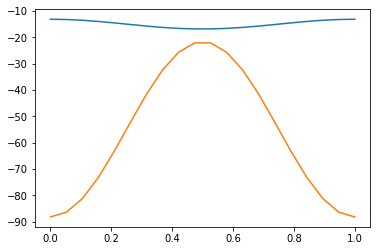

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 20)
xj = -14.9593 + 1.84831899*np.cos(2*np.pi*t)
xa = -54.9131 - 33.27123058*np.cos(2*np.pi*t)

plt.plot(t, xj)
plt.plot(t, xa)
